# Challenges 1-3

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
bills=['handicapped-infants','water-project-cost-sharing','adoption-of-the-budget-resolution','physician-fee-freeze',
   'el-salvador-aid','religious-groups-in-schools','anti-satellite-test-ban','aid-to-nicaraguan-contras', 'mx-missile',
  'immigration','synfuels-corporation-cutback','education-spending','superfund-right-to-sue','crime','duty-free-exports',
       'export-administration-act-south-africa','party']

In [3]:
df=pd.read_csv('/Users/moshelaster/nyc16_ds8/challenges/challenges_data/house-votes-84.data',header=None,names=bills)

In [4]:
df=df.replace({'y':1,'n':0})

In [5]:
maj_vote=[]
for col in df:
    maj_vote.append(df[col].value_counts().idxmax())

In [6]:
for col,val in zip(df,maj_vote):
    df[col].replace(to_replace='?',value=val,inplace=True)

In [7]:
df=df.replace({'republican.':'republican','democrat.':'democrat'})

In [86]:
df=df.replace({'republican':1,'democrat':0})

In [87]:
from sklearn.cross_validation import train_test_split

In [88]:
X=df[df.columns[:-1]]
y=df[df.columns[-1]]

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.30, random_state=4444)

In [135]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import cross_val_score

In [139]:
methods=['precision','recall','f1']

# KNN 

In [91]:
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
accuracy_score(y_test,knn.predict(X_test))

0.93129770992366412

In [92]:
classification_report(y_test,knn.predict(X_test))

'             precision    recall  f1-score   support\n\n          0       0.93      0.96      0.94        77\n          1       0.94      0.89      0.91        54\n\navg / total       0.93      0.93      0.93       131\n'

In [94]:
fpr, tpr, thresholds=roc_curve(y_test,knn.predict(X_test))

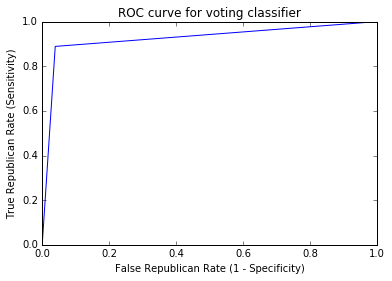

In [147]:
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for voting classifier')
plt.xlabel('False Republican Rate (1 - Specificity)')
plt.ylabel('True Republican Rate (Sensitivity)')

In [129]:
roc_auc_score(y_test,knn.predict(X_test))

0.92496392496392488

In [141]:
for method in methods:
    print method
    print cross_val_score(knn,X,y,scoring=method).mean()

precision
0.890190035953
recall
0.916666666667
f1
0.902989946468


# Logistic Regression

In [96]:
log_reg=LogisticRegression()

In [97]:
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [98]:
accuracy_score(y_test,log_reg.predict(X_test))

0.93893129770992367

In [99]:
classification_report(y_test,log_reg.predict(X_test))

'             precision    recall  f1-score   support\n\n          0       0.93      0.97      0.95        77\n          1       0.96      0.89      0.92        54\n\navg / total       0.94      0.94      0.94       131\n'

In [100]:
fpr2, tpr2, thresholds2=roc_curve(y_test,log_reg.predict(X_test))

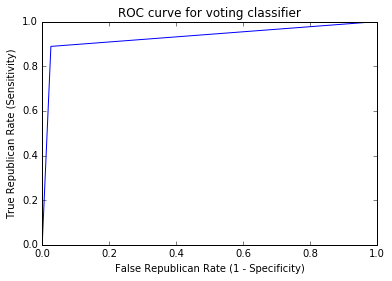

In [101]:
plt.plot(fpr2, tpr2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for voting classifier')
plt.xlabel('False Republican Rate (1 - Specificity)')
plt.ylabel('True Republican Rate (Sensitivity)')

In [130]:
roc_auc_score(y_test,log_reg.predict(X_test))

0.93145743145743143

In [142]:
for method in methods:
    print method
    print cross_val_score(log_reg,X,y,scoring=method).mean()

precision
0.954195804196
recall
0.946428571429
f1
0.949483966725


# Gaussian

In [105]:
from sklearn.naive_bayes import GaussianNB

In [106]:
gauss=GaussianNB()

In [107]:
gauss.fit(X_train,y_train)

GaussianNB()

In [108]:
accuracy_score(y_test,gauss.predict(X_test))

0.93893129770992367

In [109]:
classification_report(y_test,gauss.predict(X_test))

'             precision    recall  f1-score   support\n\n          0       0.93      0.97      0.95        77\n          1       0.96      0.89      0.92        54\n\navg / total       0.94      0.94      0.94       131\n'

In [110]:
fpr3, tpr3, thresholds3=roc_curve(y_test,gauss.predict(X_test))

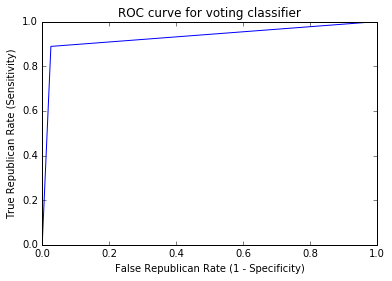

In [111]:
plt.plot(fpr3, tpr3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for voting classifier')
plt.xlabel('False Republican Rate (1 - Specificity)')
plt.ylabel('True Republican Rate (Sensitivity)')

In [131]:
roc_auc_score(y_test,gauss.predict(X_test))

0.93145743145743143

In [143]:
for method in methods:
    print method
    print cross_val_score(gauss,X,y,scoring=method).mean()

precision
0.907402305184
recall
0.904761904762
f1
0.904885526381


# Support Vectors

In [112]:
from sklearn.svm import SVC

In [113]:
svc=SVC()
svc.fit(X_train,y_train)
accuracy_score(y_test,svc.predict(X_test))

0.95419847328244278

In [114]:
classification_report(y_test,svc.predict(X_test))

'             precision    recall  f1-score   support\n\n          0       0.95      0.97      0.96        77\n          1       0.96      0.93      0.94        54\n\navg / total       0.95      0.95      0.95       131\n'

In [115]:
fpr4, tpr4, thresholds4=roc_curve(y_test,gauss.predict(X_test))

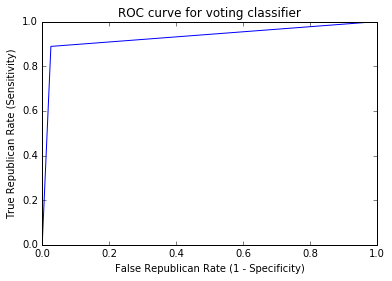

In [116]:
plt.plot(fpr4, tpr4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for voting classifier')
plt.xlabel('False Republican Rate (1 - Specificity)')
plt.ylabel('True Republican Rate (Sensitivity)')

In [132]:
roc_auc_score(y_test,svc.predict(X_test))

0.94997594997595003

In [144]:
for method in methods:
    print method
    print cross_val_score(svc,X,y,scoring=method).mean()

precision
0.922573435504
recall
0.970238095238
f1
0.945236866676


# Decision Tree

In [117]:
from sklearn.tree import DecisionTreeClassifier

In [118]:
dec_tree=DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)
accuracy_score(y_test,dec_tree.predict(X_test))

0.91603053435114501

In [119]:
classification_report(y_test,dec_tree.predict(X_test))

'             precision    recall  f1-score   support\n\n          0       0.91      0.95      0.93        77\n          1       0.92      0.87      0.90        54\n\navg / total       0.92      0.92      0.92       131\n'

In [120]:
fpr5, tpr5, thresholds5=roc_curve(y_test,gauss.predict(X_test))

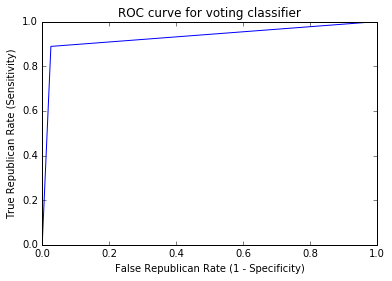

In [121]:
plt.plot(fpr5, tpr5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for voting classifier')
plt.xlabel('False Republican Rate (1 - Specificity)')
plt.ylabel('True Republican Rate (Sensitivity)')

In [133]:
roc_auc_score(y_test,dec_tree.predict(X_test))

0.90921115921115914

In [145]:
for method in methods:
    print method
    print cross_val_score(dec_tree,X,y,scoring=method).mean()

precision
0.881281565657
recall
0.940476190476
f1
0.92645205911


# Random Forest

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
rand_for=RandomForestClassifier()
rand_for.fit(X_train,y_train)
accuracy_score(y_test,rand_for.predict(X_test))

0.93893129770992367

In [124]:
classification_report(y_test,rand_for.predict(X_test))

'             precision    recall  f1-score   support\n\n          0       0.92      0.99      0.95        77\n          1       0.98      0.87      0.92        54\n\navg / total       0.94      0.94      0.94       131\n'

In [125]:
fpr6, tpr6, thresholds6=roc_curve(y_test,gauss.predict(X_test))

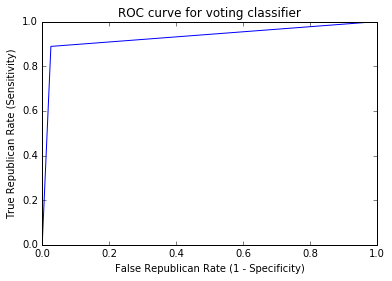

In [126]:
plt.plot(fpr6, tpr6)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for voting classifier')
plt.xlabel('False Republican Rate (1 - Specificity)')
plt.ylabel('True Republican Rate (Sensitivity)')

In [134]:
roc_auc_score(y_test,rand_for.predict(X_test))

0.92869167869167868

In [146]:
for method in methods:
    print method
    print cross_val_score(rand_for,X,y,scoring=method).mean()

precision
0.936176648518
recall
0.940476190476
f1
0.953253222707


# Challenge 4

In [148]:
movies=pd.read_csv('/Users/moshelaster/nyc16_ds8/challenges/challenges_data/2013_movies.csv')
movies=movies[movies.Budget>0]
def runtime(r):
    if r > 100:
        return 1
    else:
        return 0
movies.Runtime=movies.Runtime.apply(runtime)
movies=pd.concat([movies,pd.get_dummies(movies.Rating)],axis=1)
y_mov=movies.Runtime
X_mov=movies[['Budget','DomesticTotalGross','PG','PG-13','R']]

In [150]:
X_movtrain, X_movtest, y_movtrain, y_movtest = train_test_split(X_mov, y_mov,test_size=.30, random_state=4444)

In [151]:
knnmov=KNeighborsClassifier(n_neighbors=23)
knnmov.fit(X_movtrain, y_movtrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=23, p=2,
           weights='uniform')

In [153]:
classification_report(y_movtest,knnmov.predict(X_movtest))

'             precision    recall  f1-score   support\n\n          0       1.00      0.14      0.25         7\n          1       0.77      1.00      0.87        20\n\navg / total       0.83      0.78      0.71        27\n'

In [154]:
log_regmov=LogisticRegression()
log_regmov.fit(X_movtrain,y_movtrain)
classification_report(y_movtest,log_regmov.predict(X_movtest))

/Users/moshelaster/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'             precision    recall  f1-score   support\n\n          0       0.00      0.00      0.00         7\n          1       0.74      1.00      0.85        20\n\navg / total       0.55      0.74      0.63        27\n'

# Challenge 5

In [155]:
info=['age','op_year','nodes','survive']
df2=pd.read_csv('/Users/moshelaster/nyc16_ds8/challenges/challenges_data/haberman.data',header=None,names=info)

In [156]:
df2.survive=df2.survive.apply(lambda x: x-1)

In [157]:
log_reg_2=LogisticRegression()

In [159]:
log_reg_2.fit(df2.iloc[:,:-1],df2.survive)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [164]:
df2.iloc[:,:-1].shape, df2.survive.shape

((306, 3), (306,))

In [165]:
roc_curve(df2.survive,log_reg_2.predict(df2.iloc[:,:-1]))

(array([ 0.        ,  0.04444444,  1.        ]),
 array([ 0.        ,  0.17283951,  1.        ]),
 array([2, 1, 0]))

In [166]:
roc_auc_score(df2.survive,log_reg_2.predict(df2.iloc[:,:-1]))

0.56419753086419755